**1. Bellevue.edu Site Link Analysis**

In this part of the exercise, you will be examining the Bellevue University web site. The bellevue.edu directory contains two CSV files, all_links.csv and content_links.csv. The all_links.csv contains all the links between the pages including links from the default navigation bar. The content_links.csv file only contains links between pages if those links occurred in the content of the page and not in the navigation bar.

The files contain two columns of data, src_link and dst_link. The src_link indicates the page that contains a link to the dst_link. The links are relative to the main page, so / resolves to http://www.bellevue.edu while /degrees resolves to http://www.bellevue.edu/degrees.

For this exercise, you will need to create a Networkx DiGraph from both datasets. A Networkx DiGraph is a directed graph where each node is a relative URL for a page on the Bellevue University website, and each edge represents a link from one page to another. See Networkx’s tutorial if you need help creating these graphs.

**a. Clicks from the Homepage**

Using the all_links.csv dataset, you will determine how many clicks it takes to get from the homepage to every other page. You can calculate the number of clicks it takes to get from the homepage to any other page by calculating the shortest path length from the homepage (/) as the source node and the destination link as the target node. You may need to check if there is a path between the homepage and the destination link.

Provide a summary of the number of clicks each page is away from the main page (i.e., the / link) using the following format.
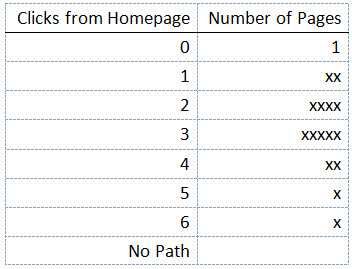

**b. PageRank**

Using the content_links.csv data, calculate the PageRank for each node. PageRank is an algorithm first developed by Google to determine the importance of a website by looking at the links between websites. Intuitively, the PageRank algorithm simulates a web user clicking random links on a website. The PageRank of a site is a measure of the likelihood a user would land on that site by randomly clicking links.

This means a page is more important if other pages link to it.

Provide a summary of the top 20 pages by PageRank using the following format.

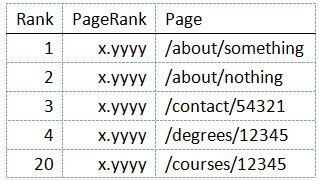

#### a.Clicks from the Homepage

In [1]:
# Import required libraries
import networkx as nx
import pandas as pd
import numpy as np
import json
import string
import re
import statistics

In [3]:
# Read data from the csv file
file = 'data/bellevue.edu/all_links.csv'

df_buall = []
df_buall = pd.read_csv(file)

df_buall.head()

,src_link,dst_link
0,/RFI,/
1,/RFI,/about/about-us
2,/RFI,/about/about-us/news-events-calendar/calendar
3,/RFI,/about/accreditation-awards
4,/RFI,/about/alumni


In [43]:
# Create function to extract the desired output
def get_clicks(source_df, source_col, target_col, home, DG = 'Y'):
    """Create data frame with number of pages and clicks from homepage"""
    """Input: Source dataframe, source link, target link, homepage, Digraph (Y/N)"""
    """Output: Formatted data frame with clicks and number of pages"""
    
    # Check if digraph is needed
    if DG == 'Y':
        G = nx.from_pandas_edgelist(source_df, source=source_col, target=target_col, edge_attr=None, create_using=nx.DiGraph())
    else:
        G = nx.from_pandas_edgelist(source_df, source=source_col, target=target_col, edge_attr=None, create_using=None)
    
    # Hold shortest path to a dictionary
    dict_G = nx.single_source_shortest_path_length(G, home)
    
    # Create data frame and format
    df_G = pd.DataFrame.from_dict(dict_G, orient='index', columns = ['Clicks from Homepage'])
    df_G.reset_index(inplace=True)
    df_G.rename(index=str, columns={'index': 'Pages'}, inplace=True)
    df_G['Number of Pages'] = df_G[['Pages']].applymap(lambda x: str.count(x, '/'))
    df_G.drop(columns = ['Pages'])
    
    return df_G

# Create output
df_result = get_clicks(df_buall, 'src_link', 'dst_link', '/', 'Y')
df_result.head(20)

,Pages,Clicks from Homepage,Number of Pages
0,/,0,1
1,/RFI,1,1
2,/about/about-us,1,2
3,/about/about-us/news-events-calendar/calendar,1,4
4,/about/accreditation-awards,1,2
5,/about/alumni,1,2
6,/about/alumni/giving-to-bellevue,1,3
7,/about/leadership/faculty-information/emergenc...,1,4
8,/about/leadership/presidents-message,1,3
9,/about/media-relations,1,2


#### b. PageRank

In [44]:
# Read data from the csv file
file = 'data/bellevue.edu/content_links.csv'

df_bucontent = []
df_bucontent = pd.read_csv(file)

df_bucontent.head()

,src_link,dst_link
0,/about/about-us/community-service,/about/about-us
1,/about/about-us/community-service,/about/about-us/history
2,/about/about-us/community-service,/about/about-us/locations
3,/about/about-us/community-service,/about/about-us/mission-values
4,/about/about-us/community-service,/about/about-us/news-events-calendar/calendar


In [78]:
# Create function to extract the desired output
def get_pagerank(source_df, source_col, target_col, topN, DG='Y'):
    """Create data frame with rank and pagerank and return top N ranked items"""
    """Input: Source dataframe, source link, target link, top N ranks, Digraph (Y/N)"""
    """Output: Formatted data frame with rank, pagerank and top N ranked items"""
    
    # Check if digraph is needed
    if DG == 'Y':
        G = nx.from_pandas_edgelist(source_df, source=source_col, target=target_col, edge_attr=None, create_using=nx.DiGraph())
    else:
        G = nx.from_pandas_edgelist(source_df, source=source_col, target=target_col, edge_attr=None, create_using=None)
    
    # Create page rank
    dict_G = nx.pagerank(G)
    
    # Convert dictionary to data frame and format
    df_G = pd.DataFrame.from_dict(dict_G, orient='index', columns = ['PageRank'])
    df_G.reset_index(inplace=True)
    df_G.rename(index=str, columns={'index': 'Page'}, inplace=True)
    
    # Rank items with max page rank as rank 1 and then sort ascending by rank
    df_G['Rank'] = df_G['PageRank'].rank(ascending=0)
    df_G = df_G.sort_values(by = 'Rank', ascending=True)
    df_G = df_G[['Rank','PageRank','Page']]
    
    return df_G.head(topN)

# Create output (top 20 rank)
get_pagerank(df_bucontent,'src_link','dst_link',20, 'Y')

,Rank,PageRank,Page
101,1.0,0.017546,/about/leadership/faculty-profiles
11,2.0,0.017114,/degrees/academic-catalog/signature-series
98,3.0,0.016152,/about/leadership/colleges
100,4.0,0.015484,/about/leadership/executives
102,5.0,0.015109,/about/leadership/presidents-message
97,6.5,0.015109,/about/leadership/board-of-directors
99,6.5,0.015109,/about/leadership/deans
331,8.0,0.014253,/degrees/academic-catalog/courses
252,9.0,0.013918,/degrees/academic-catalog/natural-science
250,10.0,0.013888,/degrees/academic-catalog/human-thought-expres...


**2. Featured Articles Entity Graph**

In this part of the exercise, you will extract entity pairs from the Wikipedia featured articles data set. Extract the entity pairs and load them into a Networkx graph. Using this graph, report the following basic information.

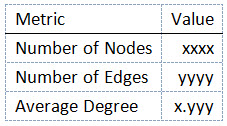

**a. Report on the top 20 nodes for each rank for degree centrality**

Report the top 20 degree centrality rankings as described in chapter 9 of the Applied Text Analysis with Python book.

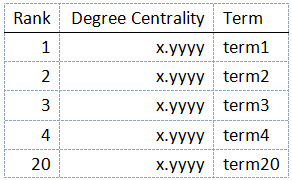

**b. Report on the top 20 nodes for each rank for betweenness centrality**

Report the top 20 betweenness centrality rankings as described in *chapter 9* of the Applied Text Analysis with Python book.

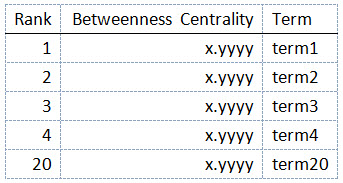

In [2]:
# Read the json files as data frame
def read_files(dirdata, infile):
    """Input: Data file location, file name"""
    """Output: Dataframe with data file content"""
    
    data = []

    full_filename = "%s/%s" % (dirdata, infile)
        
    with open(full_filename,'r') as fi:
        for line in fi:
            data.append(json.loads(line))

    # Create data frame from the json data
    outdf = pd.DataFrame(data)
    
    return outdf

# Make everything lower case, remove punctuation and newline
def clean_text(df):
    """Input: Dataframe to be cleaned"""
    """Output: Cleaned dataframe"""
    
    punc = string.punctuation.replace('<', '').replace('>', '')
    pat = re.compile(f'[{punc}]')
    
    # Change text to lower case
    df = df.apply(lambda x: x.astype(str).str.lower())
    
    # Remove punctuation
    #df = df.replace(pat, '')
    
    # Replace newline
    df = df.replace(r'\\n',' ', regex=True).replace(r'\\',' ', regex=True)
    
    return df

In [5]:
# Read the data in
dirdata = 'data/wikipedia/featured-articles'

# Having provision to load multiple files but using just 1 file for now
files = ['featured-articles_011.jsonl']

# Read files, clean and store as data frame
article = clean_text(read_files(dirdata, files[0]))

#article = pd.DataFrame(article['interlinks']).replace(['{',"'"],['',''], regex=True)

article.head()
#article.str.split(pat = ":")

,interlinks,section_texts,section_titles,title
0,"{'metallurgy': 'metallurgist', 'industrialist'...","["" '''elwood haynes''' (october 14, 1857 xa0–...","['introduction', 'early life', 'enterprises', ...",elwood haynes
1,{'university of southern california': 'univers...,[' the ' ' '2007 usc trojans football team ...,"['introduction', 'before the season', 'schedul...",2007 usc trojans football team
2,"{'pre-columbian era': 'pre-columbian era', 'pe...","["" norte chico civilization base of norte chi...","['introduction', 'history and geography', 'geo...",norte chico civilization
3,"{'estrildid finch': 'estrildid finch', 'endemi...","["" the '''fiji parrotfinch''' (''erythrura p...","['introduction', 'taxonomy', 'description', 'd...",fiji parrotfinch
4,"{'riga': 'riga', 'latvia': 'latvia', 'latvian ...","[' the ' ' 'freedom monument ' ' ' (, ) i...","['introduction', 'design', 'location', 'constr...",freedom monument


0    {'metallurgy': 'metallurgist', 'industrialist'...
1    {'university of southern california': 'univers...
2    {'pre-columbian era': 'pre-columbian era', 'pe...
3    {'estrildid finch': 'estrildid finch', 'endemi...
4    {'riga': 'riga', 'latvia': 'latvia', 'latvian ...
Name: interlinks, dtype: object

## Start from here for 2

**3. Bot Detection on Reddit**

Your data directory should contain the file user_comment_links.csv the reddit directory. This file contains three fields.

user1: The Reddit username of the first user
user2: The Reddit username of the second user
num_comments: The number of times user1 commented on something user2 wrote
Using Networkx, create a directed graph of user comments. The following is Python demonstrating how to add a weighted edge in a directed graph.

reporting format

In this exercise, you will use the degree centrality algorithm to find users who are central to in the communication graph. These users are most likely automated bots which explain how they are able to communicate with a wide variety of users across multiple subreddits.

**a. Graph Information**

Report the following basic information.

reporting format

**b. Degree Centrality**

Report the top 20 degree centrality rankings as described in chapter 9 of the Applied Text Analysis with Python book.

reporting format

**a. Graph Information**

In [2]:
# Read data from the csv file
file = 'data/reddit/user_comment_links.csv'

df_reddit = []
df_reddit = pd.read_csv(file)

df_reddit.head()

,user1,user2,num_comments
0,-----------------www,zcc0nonA,1
1,----------_----,Amicus-Regis,1
2,----------_----,BobIV,2
3,----------_----,Dont-worry-about-it,1
4,----------_----,Felikitsune,1


In [8]:
# Create directed graph object
G = nx.DiGraph()

# Add data to graph
for i in range(len(df_reddit)):
    user1 = df_reddit.user1[i]
    user2 = df_reddit.user2[i]
    weight = df_reddit.num_comments[i]
    G.add_edge(user1, user2, Weight = weight)
    
# Print graph info
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 1160746
Number of edges: 1724191
Average in degree:   1.4854
Average out degree:   1.4854


**b. Degree Centrality**

In [56]:
# Claculate degree of centrality and store in a dictionary
dc = nx.degree_centrality(G)

# Get top 20 cardinalities and store in a dataframe
df_dc = pd.DataFrame.from_dict(sorted(dc.items(), reverse=True, key=lambda item: item[1])[:20])
df_dc.columns = ['User','Degree Centrality']

# Add rank
df_dc['Rank'] = df_dc['Degree Centrality'].rank(ascending=0)

# Output
print(df_dc)

                    User  Degree Centrality  Rank
0          AutoModerator           0.005736   1.0
1        youtubefactsbot           0.001446   2.0
2         MTGCardFetcher           0.000731   3.0
3         TotesMessenger           0.000661   4.0
4               Roboragi           0.000524   5.0
5             GoTradeBot           0.000521   6.0
6    WritingPromptsRobot           0.000503   7.0
7            RemindMeBot           0.000477   8.0
8   ColouredUncommonsBot           0.000451   9.0
9       Mentioned_Videos           0.000413  10.0
10              autotldr           0.000395  11.0
11          HollywoodBot           0.000378  12.0
12            Pickle-Pee           0.000294  13.0
13                ameoba           0.000292  14.0
14             Yuurithra           0.000285  15.0
15        TrumpTrain-bot           0.000281  16.0
16             downgoats           0.000268  17.0
17          Jayproskills           0.000267  18.0
18            BmanUltima           0.000260  19.0


**End of Code**